In [3]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Problem: from service quality and food quality to tip amount
x_service = np.arange(0, 10.01, 0.5)
x_food = np.arange(0, 10.01, 0.5)
x_tip = np.arange(0, 25.01, 1.0)

In [5]:
# Membership functions
service_low = fuzz.trimf(x_service, [0, 0, 5])
service_middle = fuzz.trimf(x_service, [0, 5, 10])
service_high = fuzz.trimf(x_service, [5, 10, 10])
food_low = fuzz.zmf(x_food, 0, 5)
food_middle = fuzz.pimf(x_food, 0, 4, 5, 10)
food_high = fuzz.smf(x_food, 5, 10)
tip_low = fuzz.trimf(x_tip, [0, 0, 13])
tip_middle = fuzz.trimf(x_tip, [0, 13, 25])
tip_high = fuzz.trimf(x_tip, [13, 25, 25])

In [6]:
# Input: service score and food score
service_score = 9.5
food_score = 4.0
service_low_degree = fuzz.interp_membership(x_service, service_low, service_score)
service_middle_degree = fuzz.interp_membership(x_service, service_middle, service_score)
service_high_degree = fuzz.interp_membership(x_service, service_high, service_score)
food_low_degree = fuzz.interp_membership(x_food, food_low, food_score)
food_middle_degree = fuzz.interp_membership(x_food, food_middle, food_score)
food_high_degree = fuzz.interp_membership(x_food, food_high, food_score)

18.389729481889038
20.426977851050857
24.5
24.0
25.0


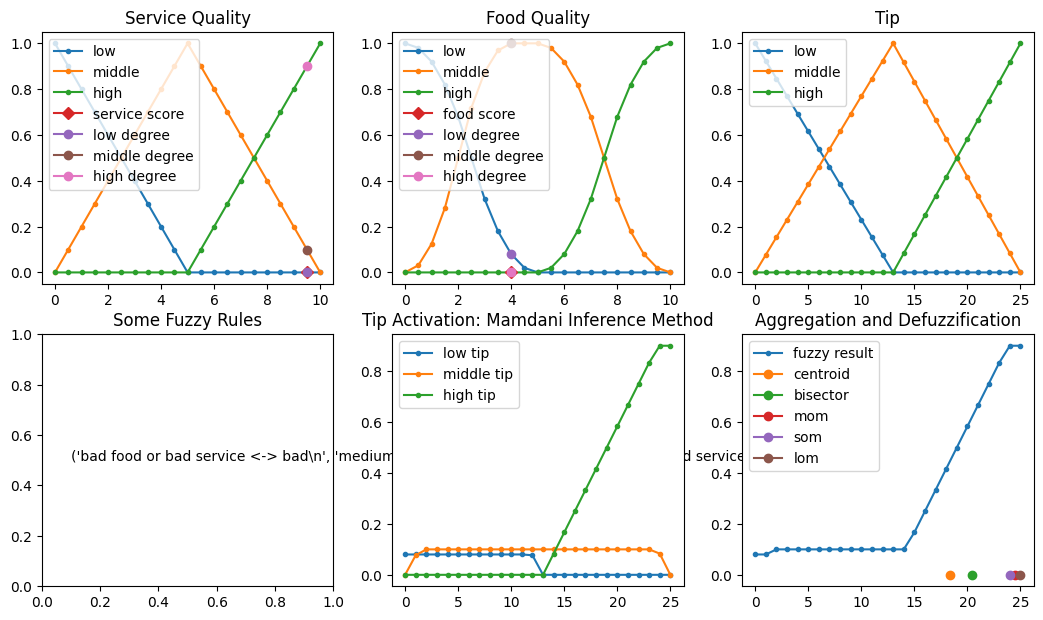

In [9]:
# Whole config
fig_scale_x = 2.0
fig_scale_y = 1.5
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * 
fig_scale_y))
row = 2
col = 3
plt.subplot(row, col, 1)
plt.title("Service Quality")
plt.plot(x_service, service_low, label="low", marker=".")
plt.plot(x_service, service_middle, label="middle", marker=".")
plt.plot(x_service, service_high, label="high", marker=".")
plt.plot(service_score, 0.0, label="service score", marker="D")
plt.plot(service_score, service_low_degree, label="low degree", marker="o")
plt.plot(service_score, service_middle_degree, label="middle degree", marker="o")
plt.plot(service_score, service_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")
plt.subplot(row, col, 2)
plt.title("Food Quality")
plt.plot(x_food, food_low, label="low", marker=".")
plt.plot(x_food, food_middle, label="middle", marker=".")
plt.plot(x_food, food_high, label="high", marker=".")
plt.plot(food_score, 0.0, label="food score", marker="D")
plt.plot(food_score, food_low_degree, label="low degree", marker="o")
plt.plot(food_score, food_middle_degree, label="middle degree", marker="o")
plt.plot(food_score, food_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")
plt.subplot(row, col, 3)
plt.title("Tip")
plt.plot(x_tip, tip_low, label="low", marker=".")
plt.plot(x_tip, tip_middle, label="middle", marker=".")
plt.plot(x_tip, tip_high, label="high", marker=".")
plt.legend(loc="upper left")

# =======================================
# Mamdani (max-min) inference method:
# * min because of logic 'and' connective.
# 1) low_degree <-> tip_low
# 2) middle_degree <-> tip_middle
# 3) high_degree <-> tip_high
# =======================================

# bad food OR bad service
low_degree = np.fmax(service_low_degree, food_low_degree)
# medium service
middle_degree = service_middle_degree
# good food OR good service
high_degree = np.fmax(service_high_degree, food_high_degree)
plt.subplot(row, col, 4)
plt.title("Some Fuzzy Rules")
t = ("bad food or bad service <-> bad\n", "medium service <-> middle\n", "good food or good service <-> good")
plt.text(0.1, 0.5, t)
activation_low = np.fmin(low_degree, tip_low)
activation_middle = np.fmin(middle_degree, tip_middle)
activation_high = np.fmin(high_degree, tip_high)
plt.subplot(row, col, 5)
plt.title("Tip Activation: Mamdani Inference Method")
plt.plot(x_tip, activation_low, label="low tip", marker=".")
plt.plot(x_tip, activation_middle, label="middle tip", marker=".")
plt.plot(x_tip, activation_high, label="high tip", marker=".")
plt.legend(loc="upper left")
# Apply the rules:
# * max for aggregation, like or the cases
aggregated = np.fmax(activation_low, np.fmax(activation_middle, activation_high))
# Defuzzification
tip_centroid = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_bisector = fuzz.defuzz(x_tip, aggregated, 'bisector')
tip_mom = fuzz.defuzz(x_tip, aggregated, "mom")
tip_som = fuzz.defuzz(x_tip, aggregated, "som")
tip_lom = fuzz.defuzz(x_tip, aggregated, "lom")
print(tip_centroid)
print(tip_bisector)
print(tip_mom)
print(tip_som)
print(tip_lom)
plt.subplot(row, col, 6)
plt.title("Aggregation and Defuzzification")
plt.plot(x_tip, aggregated, label="fuzzy result",
marker=".")
plt.plot(tip_centroid, 0.0, label="centroid", marker="o")
plt.plot(tip_bisector, 0.0, label="bisector", marker="o")
plt.plot(tip_mom, 0.0, label="mom", marker="o")
plt.plot(tip_som, 0.0, label="som", marker="o")
plt.plot(tip_lom, 0.0, label="lom", marker="o")
plt.legend(loc="upper left")
plt.show()
